In [ ]:
# STAT 457 Project 1 - Data Exploration
## Yun Kyaw, 20177325

In [1]:
# Setting up the data set and importing important packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew, norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import numpy as np
import seaborn as sns

In [178]:
train_data = pd.read_csv("W23P1_train.csv")
test_data = pd.read_csv("W23P1_test.csv")

### Data exploration of the train dataset

In [142]:
train_data.head(10)  # looking at the top 10 rows of the dataset
train_data.tail(10)  # looking at the bottom 10 rows of the dataset
train_data.info()  # looking at the columns of the dataset and their object types
train_data.isna().sum() # column-wise summary of missing values

,uid,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,31722,9.0,2013-01-07 01:50:51 UTC,-73.991421,40.750160,-73.989490,40.726085,2
1,14674,14.0,2013-01-15 20:08:00 UTC,-73.997945,40.741057,-73.956223,40.767312,6
2,37571,19.5,2013-01-20 00:25:55 UTC,-73.999161,40.688531,-74.026611,40.616634,1
3,47583,6.0,2013-01-01 02:30:00 UTC,-73.991490,40.744257,-73.980912,40.748492,1
4,29473,33.5,2013-01-02 10:45:00 UTC,-73.972773,40.677702,-73.862242,40.768117,1
5,60566,18.5,2013-01-18 09:20:41 UTC,-73.985207,40.764599,-74.014014,40.714034,1
6,56325,4.0,2013-01-29 08:38:00 UTC,-73.977032,40.756137,-73.973740,40.761447,5
7,33883,39.3,2013-01-16 09:59:00 UTC,-73.872655,40.773752,-73.972863,40.753335,1
8,31371,9.5,2013-01-31 17:28:00 UTC,-73.988647,40.718792,-74.009725,40.719937,2
9,52333,17.5,2013-01-19 03:05:00 UTC,-74.006713,40.744155,-73.948615,40.791520,5


,uid,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
34990,4244,9.0,2013-01-29 07:23:56 UTC,-73.999618,40.738173,-73.977572,40.755208,1
34991,4049,6.0,2013-01-02 23:08:49 UTC,-73.966871,40.755797,-73.956704,40.766962,1
34992,52963,7.0,2013-01-21 20:13:00 UTC,-73.987485,40.719905,-73.999058,40.727922,1
34993,60866,11.0,2013-01-20 11:40:55 UTC,-73.976327,40.744350,-73.995707,40.759198,1
34994,49438,6.0,2013-01-22 09:16:00 UTC,-74.014002,40.717662,-74.007537,40.726627,1
34995,4394,26.8,2013-01-19 10:44:03 UTC,-73.925728,40.772233,-73.945048,40.828937,1
34996,15393,10.0,2013-01-22 09:16:23 UTC,-73.969083,40.761510,-73.980582,40.744208,1
34997,12747,11.0,2013-01-30 20:42:00 UTC,-73.984145,40.774805,-73.952888,40.785968,1
34998,56763,6.0,2013-01-31 19:21:22 UTC,-73.969732,40.763715,-73.963379,40.774352,1
34999,28698,5.0,2013-01-01 11:28:25 UTC,-73.994566,40.755497,-74.005491,40.745024,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                35000 non-null  int64  
 1   fare_amount        35000 non-null  float64
 2   pickup_datetime    35000 non-null  object 
 3   pickup_longitude   35000 non-null  float64
 4   pickup_latitude    35000 non-null  float64
 5   dropoff_longitude  35000 non-null  float64
 6   dropoff_latitude   35000 non-null  float64
 7   passenger_count    35000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 2.1+ MB


uid                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

We find that the train dataset has 8 columns - uid, fare_amount, pickuo_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and passenger_count. There are 350000 rows, and there are no missing values in this dataset. Additionally, we can observe that the pickup_datetime is an object, and includes both the date and the time of the pickup, though it may be more helpful to organize this information into two columns of date and the time.

In [179]:
# determine if pickup_datetime is a datetime object
import datetime
is_datetime = isinstance(train_data["pickup_datetime"], datetime.date)


In [180]:
train_data[["pickup_date", "pickup_time", "time_zone"]] = train_data.pickup_datetime.str.split(" ", expand = True)
del train_data["pickup_datetime"]
del train_data["time_zone"]

# if it is not a datetime object, will become one:
if is_datetime == False:
    train_data["pickup_date"] = pd.to_datetime(train_data["pickup_date"]).dt.strftime('%d')
    train_data["pickup_time"] = pd.to_datetime(train_data["pickup_time"]).dt.strftime('%H')

train_data.info()
train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                35000 non-null  int64  
 1   fare_amount        35000 non-null  float64
 2   pickup_longitude   35000 non-null  float64
 3   pickup_latitude    35000 non-null  float64
 4   dropoff_longitude  35000 non-null  float64
 5   dropoff_latitude   35000 non-null  float64
 6   passenger_count    35000 non-null  int64  
 7   pickup_date        35000 non-null  object 
 8   pickup_time        35000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 2.4+ MB


,uid,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,31722,9.0,-73.991421,40.750160,-73.989490,40.726085,2,07,01
1,14674,14.0,-73.997945,40.741057,-73.956223,40.767312,6,15,20
2,37571,19.5,-73.999161,40.688531,-74.026611,40.616634,1,20,00
3,47583,6.0,-73.991490,40.744257,-73.980912,40.748492,1,01,02
4,29473,33.5,-73.972773,40.677702,-73.862242,40.768117,1,02,10
5,60566,18.5,-73.985207,40.764599,-74.014014,40.714034,1,18,09
6,56325,4.0,-73.977032,40.756137,-73.973740,40.761447,5,29,08
7,33883,39.3,-73.872655,40.773752,-73.972863,40.753335,1,16,09
8,31371,9.5,-73.988647,40.718792,-74.009725,40.719937,2,31,17
9,52333,17.5,-74.006713,40.744155,-73.948615,40.791520,5,19,03


### Test dataset exploration

In [5]:
test_data.head(10)  # looking at the top 10 rows of the dataset
test_data.tail(10)  # looking at the bottom 10 rows of the dataset
test_data.info()  # looking at the columns of the dataset and their object types
test_data.isna().sum() # column-wise summary of missing values

,uid,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,3,2013-01-29 09:59:26 UTC,-73.987309,40.729064,-73.993770,40.721086,1
1,10,2013-01-05 14:56:36 UTC,-73.978188,40.754557,-73.973773,40.760330,2
2,15,2013-01-22 14:48:00 UTC,-73.973310,40.789970,-73.948010,40.778685,5
3,16,2013-01-11 23:14:10 UTC,-73.984608,40.728920,-73.991357,40.688171,2
4,17,2013-01-31 02:59:44 UTC,-73.990671,40.724603,-73.983896,40.665502,2
5,18,2013-01-23 10:31:17 UTC,-73.943047,40.789804,-73.959197,40.767429,1
6,19,2013-01-30 10:02:39 UTC,-73.993464,40.736492,-73.999757,40.727184,1
7,21,2013-01-16 07:06:49 UTC,-73.952608,40.786480,-73.958434,40.778626,1
8,23,2013-01-08 08:34:00 UTC,-73.977942,40.783693,-73.971942,40.791933,5
9,26,2013-01-23 21:01:00 UTC,-73.972085,40.757675,-73.962713,40.770565,1


,uid,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
34990,69978,2013-01-23 21:01:00 UTC,-73.977960,40.753042,-73.978350,40.763225,1
34991,69980,2013-01-16 08:40:00 UTC,-73.981762,40.736640,-74.003320,40.717645,1
34992,69983,2013-01-07 17:33:00 UTC,-73.996217,40.750078,-73.960212,40.807922,1
34993,69984,2013-01-12 17:44:00 UTC,-73.976122,40.790742,-73.983397,40.781730,2
34994,69985,2013-01-02 13:15:00 UTC,-73.992285,40.737767,-74.006957,40.719522,1
34995,69986,2013-01-03 19:38:00 UTC,-73.998182,40.723023,-73.983858,40.760212,1
34996,69989,2013-01-24 15:01:01 UTC,-73.962019,40.768109,-73.961908,40.774133,2
34997,69993,2013-01-04 21:56:00 UTC,-73.979675,40.776138,-73.993050,40.724447,1
34998,69996,2013-01-18 23:10:13 UTC,-73.944439,40.711566,-73.996992,40.722094,1
34999,70000,2013-01-03 19:50:38 UTC,-73.976373,40.764812,-73.985828,40.751501,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                35000 non-null  int64  
 1   pickup_datetime    35000 non-null  object 
 2   pickup_longitude   35000 non-null  float64
 3   pickup_latitude    35000 non-null  float64
 4   dropoff_longitude  35000 non-null  float64
 5   dropoff_latitude   35000 non-null  float64
 6   passenger_count    35000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.9+ MB


uid                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

We find this dataset also has 35000 rows, but 7 columns - the same excluding fare_amount. Similarly to the training dataset, we will perform the same transformation of changing the pickup_datetime to two different columns

In [181]:
test_data[["pickup_date", "pickup_time", "time_zone"]] = test_data.pickup_datetime.str.split(" ", expand = True)
del test_data["pickup_datetime"]
del test_data["time_zone"]

# as it returned false, convert to datetime object
test_data["pickup_date"] = pd.to_datetime(test_data["pickup_date"]).dt.strftime('%d')
test_data["pickup_time"] = pd.to_datetime(test_data["pickup_time"]).dt.strftime('%H')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                35000 non-null  int64  
 1   pickup_longitude   35000 non-null  float64
 2   pickup_latitude    35000 non-null  float64
 3   dropoff_longitude  35000 non-null  float64
 4   dropoff_latitude   35000 non-null  float64
 5   passenger_count    35000 non-null  int64  
 6   pickup_date        35000 non-null  object 
 7   pickup_time        35000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 2.1+ MB


### Determining Multicollinearity
Next we will look at the multicollinearity, as the columns of longitude and latitude are related, thus we will see if this relation affects the results.

In [146]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
x_variables = train_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]

vif_data = pd.DataFrame()
vif_data['feature'] = x_variables.columns
vif_data['VIF'] = [variance_inflation_factor(x_variables.values, i)
                   for i in range(len(x_variables.columns))]

print(vif_data)

             feature           VIF
0   pickup_longitude  4.018223e+06
1    pickup_latitude  2.624926e+06
2  dropoff_longitude  3.632793e+06
3   dropoff_latitude  1.971473e+06
4    passenger_count  2.552577e+00


Thus, we can observe a large collinearity among the longitudes and the latitudes - to account for this we can create new columns of the distance in longitude, and distance in latitude

In [183]:
# creating the column dist_longitude that determines the distance driven by the driver
train_data.loc[train_data['pickup_longitude'] <= train_data['dropoff_longitude'], 'dist_longitude'] = train_data['dropoff_longitude'] - train_data['pickup_longitude']
train_data.loc[train_data['pickup_longitude'] > train_data['dropoff_longitude'], 'dist_longitude'] = train_data['pickup_longitude'] - train_data['dropoff_longitude']

# creating the column dist_latitude that determines the distance driven by the driver
train_data.loc[train_data['pickup_latitude'] <= train_data['dropoff_latitude'], 'dist_latitude'] = train_data['dropoff_latitude'] - train_data['pickup_latitude']
train_data.loc[train_data['pickup_latitude'] > train_data['dropoff_latitude'], 'dist_latitude'] = train_data['pickup_latitude'] - train_data['dropoff_latitude']

train_data.head(10)

,uid,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,dist_longitude,dist_latitude
0,31722,9.0,-73.991421,40.750160,-73.989490,40.726085,2,07,01,0.001931,0.024075
1,14674,14.0,-73.997945,40.741057,-73.956223,40.767312,6,15,20,0.041722,0.026255
2,37571,19.5,-73.999161,40.688531,-74.026611,40.616634,1,20,00,0.027450,0.071897
3,47583,6.0,-73.991490,40.744257,-73.980912,40.748492,1,01,02,0.010578,0.004235
4,29473,33.5,-73.972773,40.677702,-73.862242,40.768117,1,02,10,0.110531,0.090415
5,60566,18.5,-73.985207,40.764599,-74.014014,40.714034,1,18,09,0.028807,0.050565
6,56325,4.0,-73.977032,40.756137,-73.973740,40.761447,5,29,08,0.003292,0.005310
7,33883,39.3,-73.872655,40.773752,-73.972863,40.753335,1,16,09,0.100208,0.020417
8,31371,9.5,-73.988647,40.718792,-74.009725,40.719937,2,31,17,0.021078,0.001145
9,52333,17.5,-74.006713,40.744155,-73.948615,40.791520,5,19,03,0.058098,0.047365


In [184]:
# removing the columns pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude
del train_data["pickup_longitude"]
del train_data["dropoff_longitude"]
del train_data["pickup_latitude"]
del train_data["dropoff_latitude"]

In [26]:
train_data.info()
train_data.isna().sum()  # column-wise summary of missing values

0.0
0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              35000 non-null  int64  
 1   fare_amount      35000 non-null  float64
 2   passenger_count  35000 non-null  int64  
 3   pickup_date      35000 non-null  object 
 4   pickup_time      35000 non-null  object 
 5   dist_longitude   35000 non-null  float64
 6   dist_latitude    35000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.9+ MB


uid                0
fare_amount        0
passenger_count    0
pickup_date        0
pickup_time        0
dist_longitude     0
dist_latitude      0
dtype: int64

In [185]:
# looking at the multicollinearity
x_variables1 = train_data[['dist_longitude', 'dist_latitude', 'passenger_count']]

vif_data1 = pd.DataFrame()
vif_data1['feature'] = x_variables1.columns
vif_data1['VIF'] = [variance_inflation_factor(x_variables1.values, i)
                   for i in range(len(x_variables1.columns))]

print(vif_data1)

           feature       VIF
0   dist_longitude  2.019969
1    dist_latitude  2.267797
2  passenger_count  1.391119


### Visualize and calculate the skewness

dist_longitude     3.957899
fare_amount        3.279519
dist_latitude      2.741458
passenger_count    1.998194
dtype: float64

/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



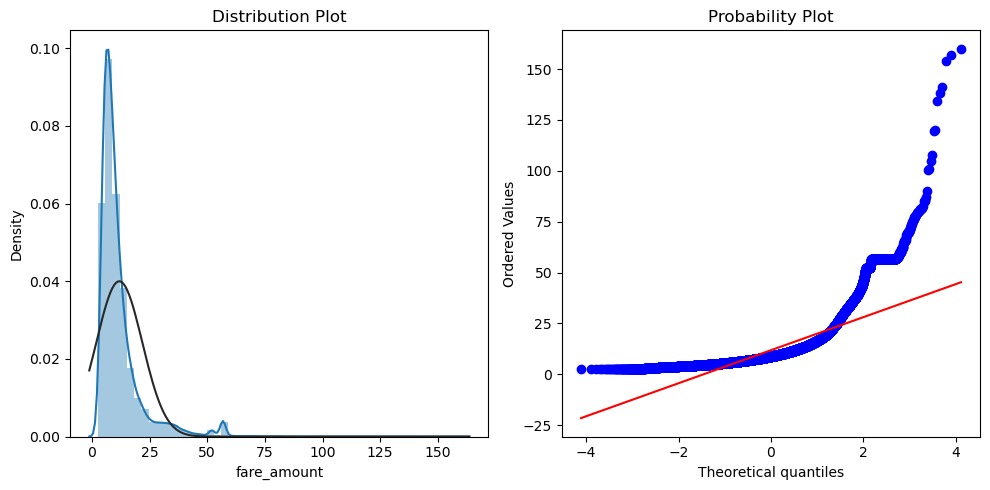

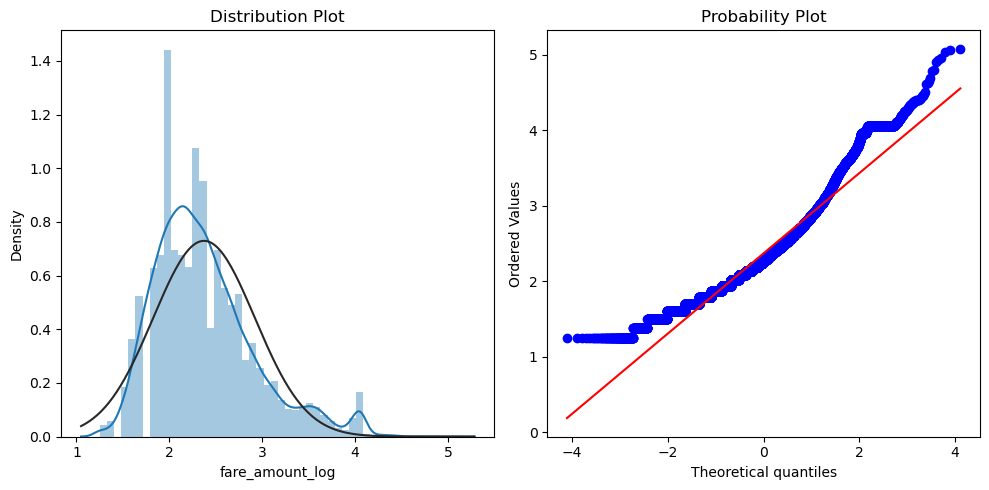

In [186]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 1]

def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

train_data['fare_amount_log'] = np.log(1 + train_data['fare_amount'])

normality_plot(train_data['fare_amount'])
normality_plot(train_data['fare_amount_log'])


In [187]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 1].index)

# Remove ['fare_amount', 'fare_amount_log']
skewed_cols = [col for col in skewed_cols if col not in ['fare_amount', 'fare_amount_log']]

# Log-transform skewed columns
for col in skewed_cols:
        train_data[col] = np.log(1 + train_data[col])

In [14]:
train_data.head(10)

,uid,fare_amount,passenger_count,pickup_date,pickup_time,dist_longitude,dist_latitude,fare_amount_log
0,31722,9.0,1.098612,07,01,0.001929,0.023790,2.302585
1,14674,14.0,1.945910,15,20,0.040875,0.025916,2.708050
2,37571,19.5,0.693147,20,00,0.027080,0.069430,3.020425
3,47583,6.0,0.693147,01,02,0.010522,0.004226,1.945910
4,29473,33.5,0.693147,02,10,0.104838,0.086558,3.540959
5,60566,18.5,0.693147,18,09,0.028400,0.049328,2.970414
6,56325,4.0,1.791759,29,08,0.003287,0.005296,1.609438
7,33883,39.3,0.693147,16,09,0.095499,0.020211,3.696351
8,31371,9.5,1.098612,31,17,0.020859,0.001144,2.351375
9,52333,17.5,1.791759,19,03,0.056473,0.046277,2.917771


From calculating the skewness we can observe that the columns pickup_longitude, fare_amount, dropoff_longitude, passenger_count, and pickup_latitude are all skewed, thus we have transformed them.

In [15]:
df = px.data.tips()
fig = px.box(train_data, y = "fare_amount")
fig.update_xaxes(type = "category")

fig1 = px.box(train_data, y = "fare_amount_log")
fig1.update_xaxes(type = "category")

We can observe that the median is 9, and generally fares are around $2.5 to $22.5

In [32]:
test_data.head(10)

,uid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,3,-73.987309,40.729064,-73.993770,40.721086,1,29,09
1,10,-73.978188,40.754557,-73.973773,40.760330,2,05,14
2,15,-73.973310,40.789970,-73.948010,40.778685,5,22,14
3,16,-73.984608,40.728920,-73.991357,40.688171,2,11,23
4,17,-73.990671,40.724603,-73.983896,40.665502,2,31,02
5,18,-73.943047,40.789804,-73.959197,40.767429,1,23,10
6,19,-73.993464,40.736492,-73.999757,40.727184,1,30,10
7,21,-73.952608,40.786480,-73.958434,40.778626,1,16,07
8,23,-73.977942,40.783693,-73.971942,40.791933,5,08,08
9,26,-73.972085,40.757675,-73.962713,40.770565,1,23,21


In [188]:
# creating the column dist_longitude that determines the distance driven by the driver
test_data.loc[test_data['pickup_longitude'] <= test_data['dropoff_longitude'], 'dist_longitude'] = test_data['dropoff_longitude'] - test_data['pickup_longitude']
test_data.loc[test_data['pickup_longitude'] > test_data['dropoff_longitude'], 'dist_longitude'] = test_data['pickup_longitude'] - test_data['dropoff_longitude']

# creating the column dist_latitude that determines the distance driven by the driver
test_data.loc[test_data['pickup_latitude'] <= test_data['dropoff_latitude'], 'dist_latitude'] = test_data['dropoff_latitude'] - test_data['pickup_latitude']
test_data.loc[test_data['pickup_latitude'] > test_data['dropoff_latitude'], 'dist_latitude'] = test_data['pickup_latitude'] - test_data['dropoff_latitude']

del test_data["pickup_longitude"]
del test_data["dropoff_longitude"]
del test_data["pickup_latitude"]
del test_data["dropoff_latitude"]

# Log-transform skewed columns
for col in skewed_cols:
        test_data[col] = np.log(1 + test_data[col])

test_data.head(10)
test_data.info()
test_data.isna().sum()

,uid,passenger_count,pickup_date,pickup_time,dist_longitude,dist_latitude
0,3,0.693147,29,09,0.006440,0.007946
1,10,1.098612,05,14,0.004405,0.005756
2,15,1.791759,22,14,0.024985,0.011222
3,16,1.098612,11,23,0.006726,0.039941
4,17,1.098612,31,02,0.006752,0.057420
5,18,0.693147,23,10,0.016021,0.022128
6,19,0.693147,30,10,0.006273,0.009265
7,21,0.693147,16,07,0.005809,0.007823
8,23,1.791759,08,08,0.005982,0.008206
9,26,0.693147,23,21,0.009328,0.012808


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              35000 non-null  int64  
 1   passenger_count  35000 non-null  float64
 2   pickup_date      35000 non-null  object 
 3   pickup_time      35000 non-null  object 
 4   dist_longitude   35000 non-null  float64
 5   dist_latitude    35000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.6+ MB


uid                0
passenger_count    0
pickup_date        0
pickup_time        0
dist_longitude     0
dist_latitude      0
dtype: int64

In [177]:
train_data.head(10)

,uid,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,time_zone
0,31722,9.0,2013-01-07 01:50:51 UTC,-73.991421,40.750160,-73.989490,40.726085,2,07,01,UTC
1,14674,14.0,2013-01-15 20:08:00 UTC,-73.997945,40.741057,-73.956223,40.767312,6,15,20,UTC
2,37571,19.5,2013-01-20 00:25:55 UTC,-73.999161,40.688531,-74.026611,40.616634,1,20,00,UTC
3,47583,6.0,2013-01-01 02:30:00 UTC,-73.991490,40.744257,-73.980912,40.748492,1,01,02,UTC
4,29473,33.5,2013-01-02 10:45:00 UTC,-73.972773,40.677702,-73.862242,40.768117,1,02,10,UTC
5,60566,18.5,2013-01-18 09:20:41 UTC,-73.985207,40.764599,-74.014014,40.714034,1,18,09,UTC
6,56325,4.0,2013-01-29 08:38:00 UTC,-73.977032,40.756137,-73.973740,40.761447,5,29,08,UTC
7,33883,39.3,2013-01-16 09:59:00 UTC,-73.872655,40.773752,-73.972863,40.753335,1,16,09,UTC
8,31371,9.5,2013-01-31 17:28:00 UTC,-73.988647,40.718792,-74.009725,40.719937,2,31,17,UTC
9,52333,17.5,2013-01-19 03:05:00 UTC,-74.006713,40.744155,-73.948615,40.791520,5,19,03,UTC


In [189]:
# creating the new training and testing dataset from the pre-processed data for prediction models to be performed in R
train_data.to_csv("train_data.csv",index = False)
test_data.to_csv("test_data.csv",index = False)

### Exploratory Data Analysis Questions
1. Which location has the most pickups?
2. Which weekday has the highest average trip fare?
3. Which hour has the highest average trip fare?
4. Does the number of passengers affect significantly the fare?

In [192]:
train_data = pd.read_csv("W23P1_train.csv")
test_data = pd.read_csv("W23P1_test.csv")

In [156]:
# 1. looking at the location with the most pickups - looking at the distribution of the longitude and latitude from pickup_longitude nad pickup_latitude
pickup_long_dist = train_data['pickup_longitude'].value_counts().rename_axis('pickup_longitude').reset_index(name='counts')
pickup_lat_dist = train_data['pickup_latitude'].value_counts().rename_axis('pickup_latitude').reset_index(name='counts')

In [57]:
pickup_long_dist.head(10) # most pickups at -73.982300 and -73.981947 each with a count of 9
pickup_lat_dist.head(10) # most pickups at 40.837168 with a counto f 9

,pickup_longitude,counts
0,-73.982300,9
1,-73.981947,9
2,-73.850417,8
3,-73.982197,8
4,-73.982323,7
5,-73.982327,7
6,-73.988977,7
7,-73.990170,7
8,-73.981375,7
9,-73.991448,7


,pickup_latitude,counts
0,40.837168,8
1,40.774077,7
2,40.748417,7
3,40.758147,7
4,40.755927,6
5,40.774142,6
6,40.773692,6
7,40.756227,6
8,40.774092,6
9,40.733992,6


In [158]:
px.histogram(pickup_long_dist, x = 'pickup_longitude', y = 'counts', 
             labels={
                     "pickup_longitude": "Pickup Longitude",
                     "counts": "Counts" },
                title = 'Distribution of Pickup Longitude')
px.histogram(pickup_lat_dist, x = 'pickup_latitude', y = 'counts', 
             labels={
                     "pickup_latitude": "Pickup Latitude",
                     "counts": "Counts" },
                title = 'Distribution of Pickup Latitude')

In [201]:
# 2. which day has the most pickups
train_data[["pickup_date", "pickup_time", "time_zone"]] = train_data.pickup_datetime.str.split(" ", expand = True)
train_data["pickup_date"] = pd.to_datetime(train_data["pickup_date"]).dt.strftime('%d')
train_data["pickup_time"] = pd.to_datetime(train_data["pickup_time"]).dt.strftime('%H')

pickup_day_dist = train_data['pickup_date'].value_counts().rename_axis('pickup_date').reset_index(name='counts')
pickup_day_dist = pickup_day_dist.sort_values('pickup_date')


In [209]:
px.histogram(pickup_day_dist, x = 'pickup_date', y = 'counts', labels={
                     "pickup_date": "Pickup Date" },
                title = 'Distribution of Pickup Dates')
# find most pickups on the 25th with 1296, and least on the 2nd with 918 

In [210]:
# 3. Which hour has the highest average trip fare
avg_fare = {"pickup_time": train_data["pickup_time"], "fare_amount": train_data["fare_amount"]}
avg_fare = pd.DataFrame(avg_fare)

In [211]:
hourly_fare = avg_fare.groupby('pickup_time')['fare_amount'].mean()

fare_hourly = []
for i in hourly_fare:
    fare_hourly.append(i)

print(fare_hourly)


[12.97407120743034, 12.415509518477043, 12.346575342465753, 12.680164533820841, 15.435286458333332, 16.973098591549295, 12.4764164305949, 11.732753403933435, 11.3845737913486, 11.269312169312169, 11.245072190834904, 11.738483685220729, 10.834899713467049, 11.540318080357142, 12.222751605995716, 12.939408284023667, 12.090278721957851, 11.48628269337785, 11.421012832263978, 10.934627539503387, 11.310230547550432, 11.448539553752536, 12.074560468833244, 12.295941853422168]


In [216]:
max_fare = max(fare_hourly)
max_index = fare_hourly.index(max_fare)
print("The maximum fare is at the hour: ", max_index, ". The average fare is: ", max_fare)

min_fare = min(fare_hourly)
min_index = fare_hourly.index(min_fare)
print("The minimum fare is at the hour: ", min_index, ". The average fare is: ", min_fare)

The maximum fare is at the hour:  5 . The average fare is:  16.973098591549295
The minimum fare is at the hour:  12 . The average fare is:  10.834899713467049


Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Fare')

Text(0.5, 1.0, 'Average Hourly Fare')

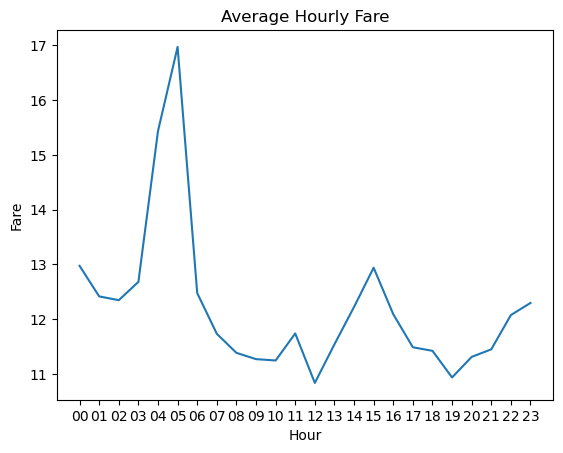

In [213]:
# plotting the points 
plt.plot(hourly_fare)

plt.xlabel('Hour')
# naming the y axis
plt.ylabel('Fare')
  
# giving a title to my graph
plt.title('Average Hourly Fare')
  
# function to show the plot
plt.show()

In [197]:
# 4 Look at the average fare given the number of riders and the differnce with ANOVA
avg_rider = {"passenger_count": train_data["passenger_count"], "fare_amount": train_data["fare_amount"]}
avg_rider = pd.DataFrame(avg_rider)


In [199]:
avg_rider.head(10)

,passenger_count,fare_amount
0,2,9.0
1,6,14.0
2,1,19.5
3,1,6.0
4,1,33.5
5,1,18.5
6,5,4.0
7,1,39.3
8,2,9.5
9,5,17.5


Text(0.5, 0, 'Number of Passengers')

Text(0, 0.5, 'Fare')

Text(0.5, 1.0, 'Average Fare vs Number of Passengers')

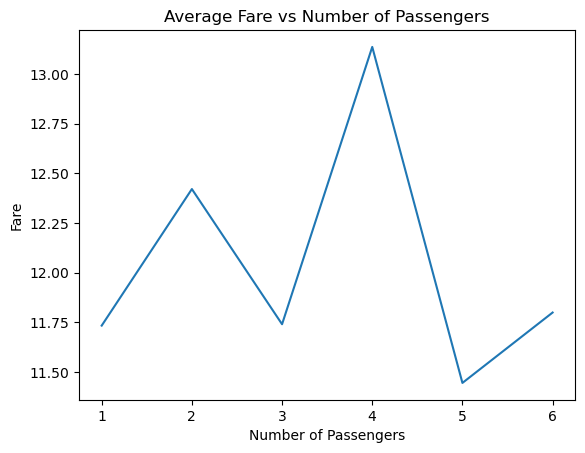

In [126]:
# plotting the points 
plt.plot(rider_fare)

plt.xlabel('Number of Passengers')
# naming the y axis
plt.ylabel('Fare')
  
# giving a title to my graph
plt.title('Average Fare vs Number of Passengers')
  
# function to show the plot
plt.show()